In [12]:
import numpy as np

correction_factor = (2*(4*10**(-9)))/(50*(2**12)*32)
print(correction_factor)

factor = correction_factor/(1.602*10**(-19))

gain = np.array([1204672.8751841278, 1480296.7913627254, 
                 #1672174.0, 
                 1755886.0145901076, 2026677.3576629583, 2301145.816228498, 2562167.80927299, 2827274.0798925688])
gain_err = np.array([825.1789458845745, 2514.1852481602587, 
                     #3315.4219, 
                     3158.7454982920935, 4372.795752595438, 8649.542292298285, 9817.254492986263, 11932.651951334034])
adcconv = np.array([158.09625670000415, 194.26799286379202, 
                    #219.44917, 
                    230.435176068985, 265.97270544187876, 301.9928041552325, 336.2482446709006, 371.03968878492833])
adcconv_err = np.array([0.10829305211347666, 0.32995121295791996, 
                        #0.43510216, 
                        0.4145406188145814, 0.5738675237402945, 1.1351299483452908, 1.2883756398808262, 1.5659916022609608])
vbias = np.array([54, 54.5, 
                  #54.96, 
                  55, 55.5, 56, 56.5, 57])

1.2207031250000001e-15


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.884 (χ²/ndof = 1.2)      │              Nfcn = 131              │
│ EDM = 2.89e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  547.0e3  │   1.6e3   │   -1.6e3   │   1.6e3    │         │         │       │
│ 1 │ b    │  51.797   │   0.007   │   -0.007   │   0.007    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -1.6e3   │   1.6e3   │  -0.007   │   0.007   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 2.64e+06 11.52504 │
│ b │ 11.52504 5.21e-05 │
└───┴───────────────────┘

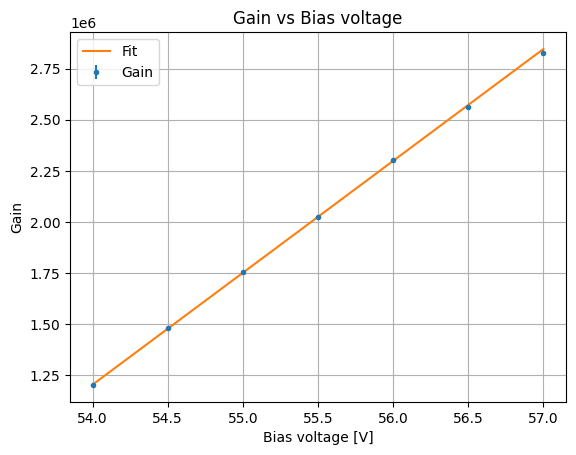

In [13]:
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares

def linear_fit(x, a, b):
    return a*(x - b)

ls = LeastSquares(x=vbias, y=gain, yerror=gain_err, model=linear_fit)
m = Minuit(ls, a=547000, b=50)
m.migrad()
m.hesse()
m.minos()
display(m)

fig, ax = plt.subplots()
ax.errorbar(vbias, gain, yerr=gain_err, fmt='.', label='Gain')
ax.plot(vbias, linear_fit(vbias, *m.values), label='Fit')
ax.set_xlabel('Bias voltage [V]')
ax.set_ylabel('Gain')
plt.title('Gain vs Bias voltage')
ax.legend()
ax.grid()
plt.show()

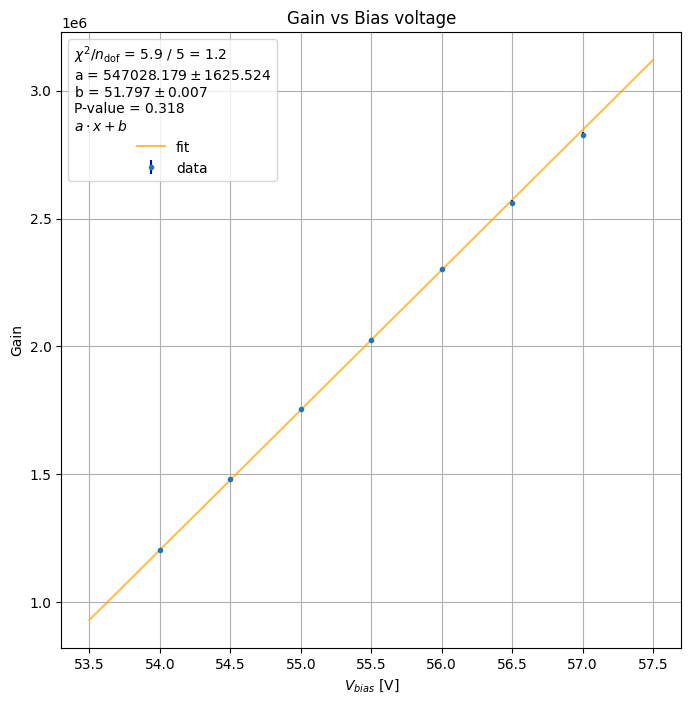

In [14]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
xaxis=np.linspace(53.5, 57.5, 100000)
plt.figure(figsize=(8,8))
plt.plot(xaxis, linear_fit(xaxis, *m.values), label="fit", color='orange', alpha=0.7)
plt.errorbar(vbias, gain, yerr=gain_err, fmt=".", ecolor='Blue', label="data")
ndof = len(gain) - 2
p_value = (1. - chi2.cdf (m.fval, df = ndof))
chi_reduced = m.fval / ndof

# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {ndof:.0f} = {chi_reduced:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

fit_info.append(f"P-value = {p_value:.3f}")
fit_info.append(f"$a \cdot x+b $")
plt.legend(title="\n".join(fit_info), frameon=True)

plt.grid(True)
plt.xlabel("$V_{bias}$ [V]")
plt.ylabel("Gain")
plt.title("Gain vs Bias voltage")

plt.savefig("fit_gain.png", dpi=300)

In [15]:
brk = m.values['b']
brk_err = m.errors['b']

brk_daniele = 51.397
brk_err_daniele = 0.219

t=(brk-brk_daniele)/np.sqrt(brk_err**2 + brk_err_daniele**2)

print("V_breakdown =", brk)
print("V_breakdown error =", brk_err)
print("Compatibilità con il valore trovato in DCR a", t, "sigma")

V_breakdown = 51.79715253031733
V_breakdown error = 0.0072190657804430125
Compatibilità con il valore trovato in DCR a 1.8261885955559636 sigma


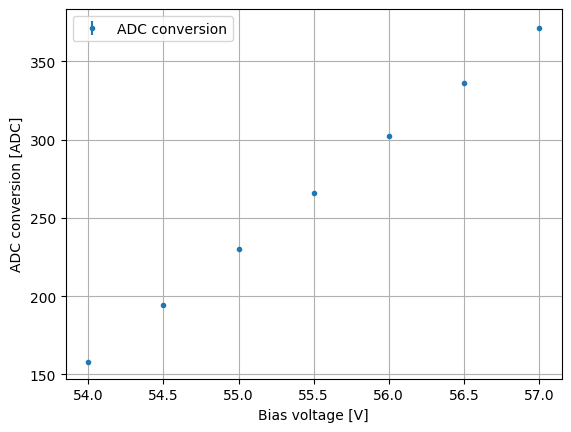

In [16]:
plt.errorbar(vbias, adcconv, yerr=adcconv_err, fmt='.', label='ADC conversion')
plt.xlabel('Bias voltage [V]')
plt.ylabel('ADC conversion [ADC]')
plt.legend()
plt.grid()
plt.show()

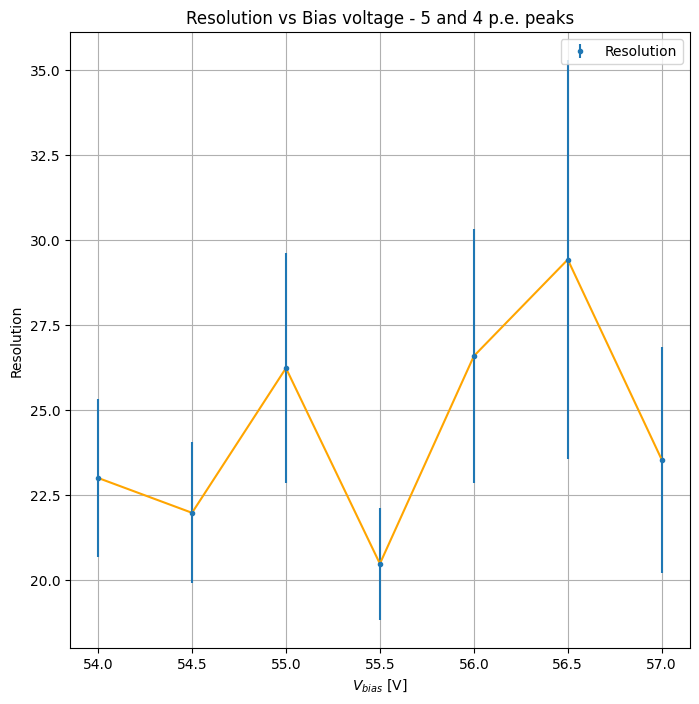

In [17]:
res = np.array([23.006914, 21.980938, 26.24014, 20.482244, 26.593927, 29.434425, 23.544561])
res_err = np.array([2.3245327, 2.0725162, 3.3765612, 1.6537675, 3.7349443, 5.8757687, 3.3215544])

plt.figure(figsize=(8,8))
plt.errorbar(vbias, res, yerr=res_err, fmt='.', label='Resolution') 
plt.plot(vbias, res, linestyle='-', color='orange')
plt.xlabel('$V_{bias}$ [V]')
plt.ylabel('Resolution')
plt.title('Resolution vs Bias voltage - 5 and 4 p.e. peaks')
plt.legend()
plt.grid()
plt.savefig("fit_resolution.png", dpi=300)
plt.show()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 38.06 (χ²/ndof = 7.6)      │              Nfcn = 323              │
│ EDM = 3.95e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  364.97   │   0.19    │   -0.19    │    0.19    │         │         │       │
│ 1 │ b    │  51.8247  │  0.0015   │  -0.0014   │   0.0015   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.19   │   0.19    │  -0.0014  │  0.0015   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │   0.0371 271.5e-6 │
│ b │ 271.5e-6 2.11e-06 │
└───┴───────────────────┘

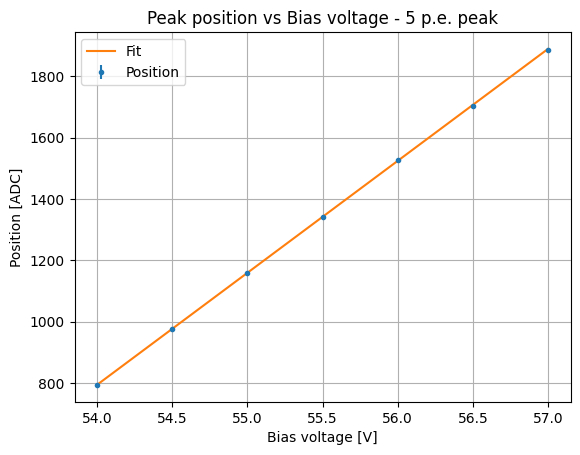

In [18]:
mu3 = np.array([793.7227952537862, 976.6226912758384, 1159.3090912800476, 1341.5747377178222, 1526.2677901933505, 1703.7280686427903, 1884.0194576102906])
mu3_err = np.array([0.18171583788218748, 0.27335089321515144, 0.36639630248263766, 0.5022338211453221, 0.6715047925943485, 0.901661044149758, 1.3090770852309412])

ls = LeastSquares(x=vbias, y=mu3, yerror=mu3_err, model=linear_fit)
m = Minuit(ls, a=1, b=1)
m.migrad()
m.hesse()
m.minos()
display(m)

fig, ax = plt.subplots()
ax.errorbar(vbias, mu3, yerr=mu3_err, fmt='.', label='Position')
ax.plot(vbias, linear_fit(vbias, *m.values), label='Fit')
ax.set_xlabel('Bias voltage [V]')
ax.set_ylabel('Position [ADC]')
plt.title('Peak position vs Bias voltage - 5 p.e. peak')
ax.legend()
ax.grid()
plt.show()

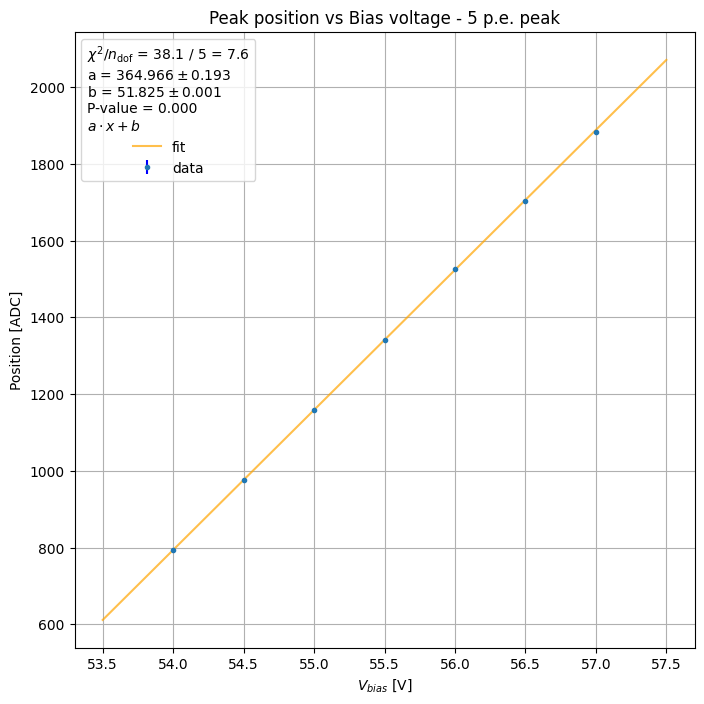

In [19]:
xaxis=np.linspace(53.5, 57.5, 100000)
plt.figure(figsize=(8,8))
plt.plot(xaxis, linear_fit(xaxis, *m.values), label="fit", color='orange', alpha=0.7)
plt.errorbar(vbias, mu3, yerr=mu3_err, fmt=".", ecolor='Blue', label="data")
ndof = len(gain) - 2
p_value = (1. - chi2.cdf (m.fval, df = ndof))
chi_reduced = m.fval / ndof

# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {ndof:.0f} = {chi_reduced:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

fit_info.append(f"P-value = {p_value:.3f}")
fit_info.append(f"$a \cdot x+b $")
plt.legend(title="\n".join(fit_info), frameon=True)

plt.grid(True)
plt.xlabel("$V_{bias}$ [V]")
plt.ylabel("Position [ADC]")
plt.title("Peak position vs Bias voltage - 5 p.e. peak")

plt.savefig("fit_position5peak.png", dpi=300)